# 目的
scikit-learnを使い、主成分分析を行う。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

### サンプルデータの生成

In [4]:
x1 = np.linspace(0.1, 1, 1000)
x2 = x1 * 0.8 + np.random.randn(1000)*0.1
X = np.vstack([x1, x2]).T
np.random.shuffle(X)

#### 散布図としてマッピング

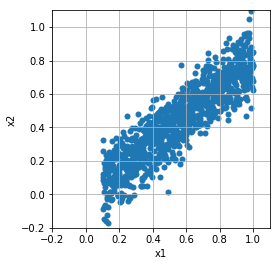

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)
sc = ax.scatter(X[: , 0], X[: , 1], linewidths="0.01")
ax.set_xlim(-0.2, 1.1)
ax.set_ylim(-0.2, 1.1)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)

### 主成分分析してみる

In [15]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print 'components(主成分)'
print pca.components_
print 'mean(平均値)'
print pca.mean_
print 'covariance-matrix(分散共分散行列)'
print pca.get_covariance()

components(主成分)
[[ 0.74620722  0.66571374]
 [ 0.66571374 -0.74620722]]
mean(平均値)
[ 0.55        0.43901853]
covariance-matrix(分散共分散行列)
[[ 0.06770284  0.05495635]
 [ 0.05495635  0.05512975]]


In [20]:
# 自分で計算してみる
mn = np.mean(X, axis=0) # 平均値 
z = X - mn
cv = np.cov(z[:,0], z[:,1], bias=0) # 分散共分散行列

In [22]:
print '平均値'
print mn
print '分散共分散行列'
print cv

平均値
[ 0.55        0.43901853]
分散共分散行列
[[ 0.06770284  0.05495635]
 [ 0.05495635  0.05512975]]


scikit-learnのpca用パッケージで計算した平均値・分散共分散行列と同じ結果になることがわかる。

#### 分散共分散行列の固有値/固有ベクトル算出

In [67]:
ev, w = np.linalg.eig(cv)

print 'eigenvector(固有ベクトル)'
print w
print 'eigenvalue(固有値)'
print ev

eigenvector(固有ベクトル)
[[ 0.74620722 -0.66571374]
 [ 0.66571374  0.74620722]]
eigenvalue(固有値)
[ 0.11673104  0.00610155]


### 先程の散布図に主成分ベクトルを図示してみる

In [86]:
#　上の固有ベクトルは列表記になっているので扱いづらい。あらためてそれぞれの固有値に対応する固有ベクトルを変数として定義し直す
## 固有値ev1に対応する固有ベクトルをw1と表記することにする
w1 = [w[0][0], w[1][0]]; w2 = [w[0][1], w[1][1]]

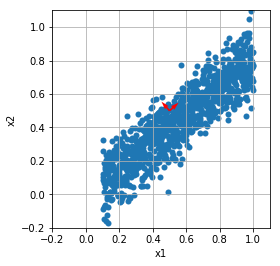

In [100]:
origin = 0.5, 0.5
w_x1 = w1[0], w2[0]
w_x2 = w1[1], w2[1]
ax.quiver(origin, origin, w_x1, w_x2, color='red', angles='xy', scale_units='xy')
fig

[-0.66571374418026907, 0.74620721707142934]